In [2]:
#time series Forecasting -super store Sales Data 

In [3]:
#We use the past value to make a forcast the future
#goal: forecast thefurniture sales

In [41]:
#importing the libraries 
import warnings
import itertools # for creating iteration for effective looping 
import numpy as np # for mathematical calculations
import matplotlib.pyplot as plt # for creating plots
warnings.filterwarnings("ignore") #for ignoring the warnings
plt.style.use('fivethirtyeight')#this tries to replicate the style from fivethirtyeight.com
import pandas as pd #for creating dataframes
import statsmodels.api as sm #used for buiding forecasting model
import seaborn as sns #for making boxplot
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'black'

#https://matplotlib.org/stable/gallery/color/named_colors.html

In [1]:
!conda install -c conda-forge fbprophet -y

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - fbprophet





==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda





The following NEW packages will be INSTALLED:

  convertdate        conda-forge/noarch::convertdate-2.3.2-pyhd8ed1ab_0
  ephem              conda-forge/win-64::ephem-3.7.7.1-py38h1e8a9f7_1
  fbprophet          conda-forge/win-64::fbprophet-0.7.1-py38h7ae7562_0
  hijri-converter    conda-forge/noarch::hijri-converter-2.1.1-pyhd8ed1ab_0
  holidays           conda-forge/noarch::holidays-0.11.1-pyhd8ed1ab_0
  korean_lunar_cale~ conda-forge/noarch::korean_lunar_calendar-0.2.1-pyh9f0ad1d_0
  libpython          conda-forge/win-64::libpython-2.0-py38haa244fe_1
  lunarcalendar      conda-forge/noarch::lunarcalendar-0.0.9-py_0
  m2w64-binutils     conda-forge/win-64::m2w64-binutils-2.25.1-5
  m2w64-bzip2        conda-forge/win-64::m2w64-bzip2-1.0.6-6
  m2w64-crt-git      conda-forge/win-64::m2w64-crt-git-5.0.0.4636.2595836-2
  m2w64-gcc          conda-forge/win-64::m2w64-gcc-5.3.0-6
  m2w64-gcc-ada      conda-forge/win-64::m2w64-gcc-ada-5.3.0-6
  m2w64-gcc-fortran  conda-forge/win-64::m2w64-gcc

In [9]:
!pip install --upgrade plotly



Requirement already up-to-date: plotly in c:\programdata\anaconda3\lib\site-packages (4.14.3)


In [42]:
from fbprophet import Prophet

In [43]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
#data exploration 

In [45]:
data = pd.read_csv('./OneDrive/Desktop/SampleSuper.csv',parse_dates=["OrderDate"]) #using pandas to read the data 
#parse_dates argument,converts date to datetime

data.head(10) # to get a snapshot of the dataset.
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
#sales data will be used for forcasting the future sales
#3 categories of data

,Row ID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [46]:
list(data.columns)

['Row ID',
 'OrderID',
 'OrderDate',
 'ShipDate',
 'ShipMode',
 'CustomerID',
 'CustomerName',
 'Segment',
 'Country',
 'City',
 'State',
 'PostalCode',
 'Region',
 'ProductID',
 'Category',
 'SubCategory',
 'ProductName',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [47]:
data.shape # to check number of rows and columns in the data

(9994, 21)

In [48]:
data.describe()

#Summary Statitics of the numerical columns

,Row ID,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [49]:
data.info() #to check the datatype of columns 
# we can remove the unwanted columns like Row ID 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   object        
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  SubCategory   9994 non-null   object  

In [50]:
data.isna().sum() #to check the missing value in the data 

Row ID          0
OrderID         0
OrderDate       0
ShipDate        0
ShipMode        0
CustomerID      0
CustomerName    0
Segment         0
Country         0
City            0
State           0
PostalCode      0
Region          0
ProductID       0
Category        0
SubCategory     0
ProductName     0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:xlabel='Sales'>

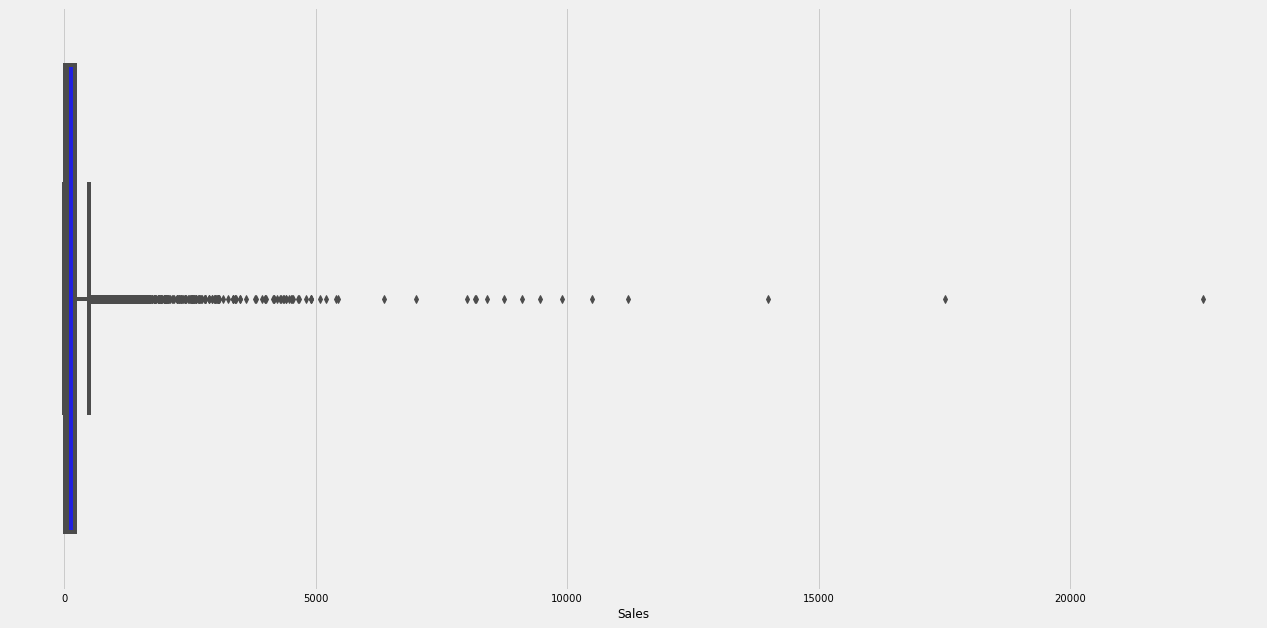

In [51]:
sns.boxplot(x= data['Sales'], color ='blue') # to check outlier data 

In [52]:
data["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x1f8272b0b80>,
 [Text(-1.0429540846910543, -0.34963806604293685, 'Office Supplies'),
  Text(1.0638343615330323, -0.2797435454511966, 'Furniture'),
  Text(0.6033787837733775, 0.9197467277963863, 'Technology')],
 [Text(-0.5688840461951205, -0.19071167238705644, '60.3%'),
  Text(0.5802732881089266, -0.1525873884279254, '21.2%'),
  Text(0.32911570024002407, 0.5016800333434834, '18.5%')])

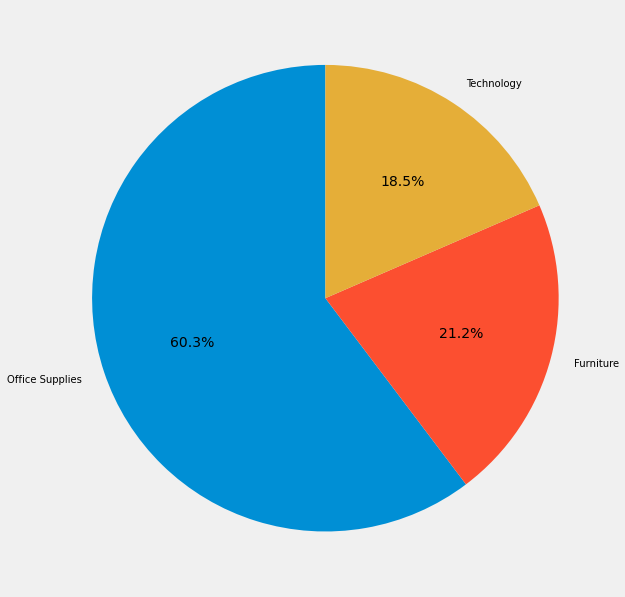

In [53]:
fig,axis = plt.subplots()
x = list(data['Category'].value_counts().index)
y = list(data['Category'].value_counts().values)
axis.pie(y,labels = x, autopct = '%1.1f%%', startangle = 90 )

In [54]:

data["ShipMode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ShipMode, dtype: int64

In [55]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='ShipMode', ylabel='count'>

Text(0.5, 0, 'Shipping Mode')

Text(0, 0.5, 'Number of Orders')

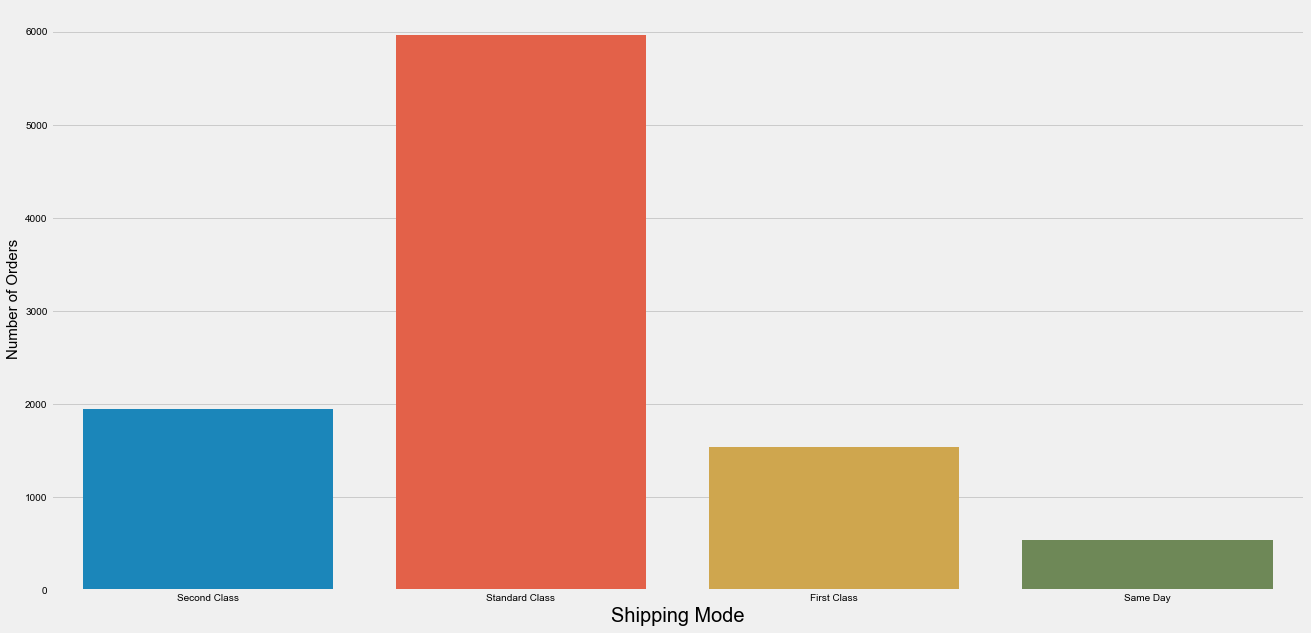

In [56]:
sns.countplot(x='ShipMode', data = data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Shipping Mode", fontsize = 20)
plt.ylabel("Number of Orders", fontsize = 15)

<AxesSubplot:>

Text(0.5, 0, 'Top Cities')

Text(0, 0.5, 'Number of Orders')

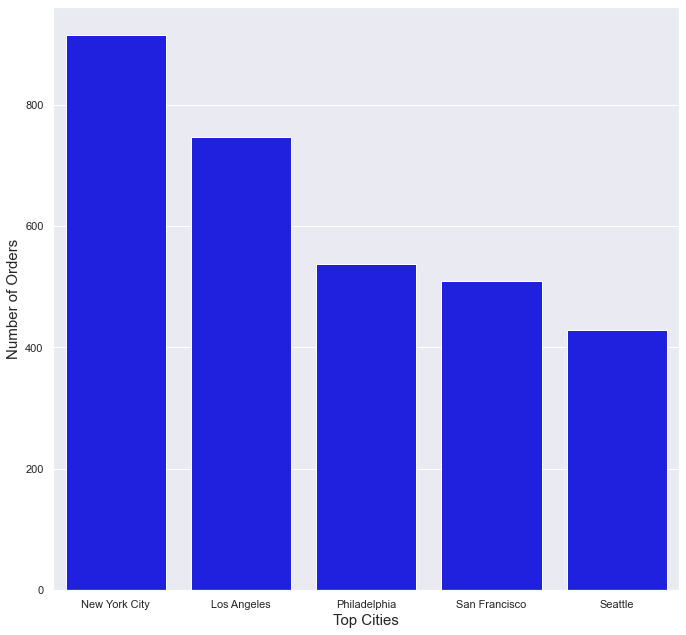

In [57]:
sns.barplot(data["City"].value_counts().head(5).index, data["City"].value_counts().head(5).values, color = "blue")
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Top Cities", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)

In [58]:
#extracting "furniture" category for the data using pandas location method 
cat_furniture = data.loc[data['Category'] == 'Furniture']
cat_furniture

,Row ID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [59]:
cat_furniture['OrderDate'].min(), cat_furniture['OrderDate'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [60]:
data["Country"].value_counts().head(10)

United States    9994
Name: Country, dtype: int64

In [61]:
data["City"].value_counts().head(10)


New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

In [62]:
#removing the unwanted columns from the data 

In [63]:
columns = ['Row ID', 'OrderID', 'ShipDate', 'ShipMode', 'CustomerID', 'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode', 'Region', 'ProductID', 'Category', 'SubCategory', 'ProductName', 'Quantity', 'Discount', 'Profit']
cat_furniture.drop(columns, axis=1, inplace=True)



In [64]:
cat_furniture = cat_furniture.sort_values('OrderDate')
cat_furniture

,OrderDate,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [65]:
cat_furniture.isnull().sum()

OrderDate    0
Sales        0
dtype: int64

In [66]:
cat_furniture = cat_furniture.set_index("OrderDate") #for making Order Date as index column


In [67]:
month_sales= cat_furniture['Sales'].resample('MS').mean() #.resampe= grouping, MS=month start.
#Grouping the values on month basis and calculating the mean
#https://www.w3resource.com/pandas/series/series-resample.php#:~:text=The%20resample()%20function%20is,the%20on%20or%20level%20keyword.
month_sales

OrderDate
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    2

In [68]:
month_sales['2015':'2016'] #slicing

OrderDate
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
Freq: MS, Name: Sales, dtype: float64

In [69]:
#Visualization 

<AxesSubplot:xlabel='OrderDate'>

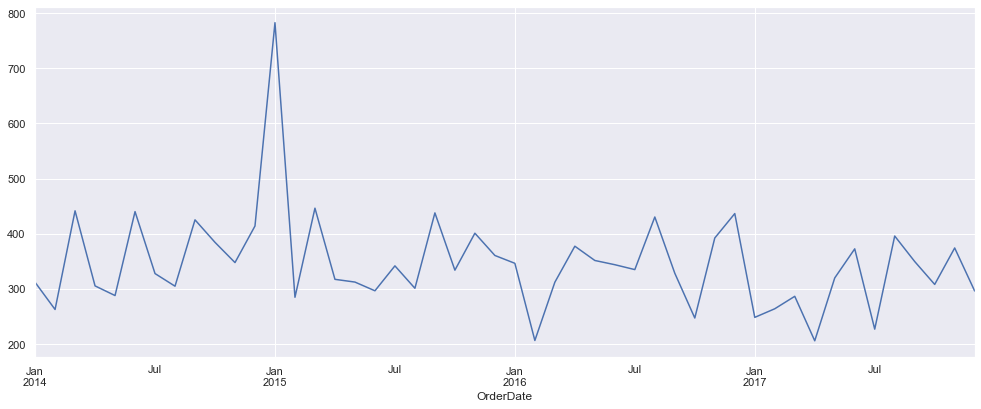

In [70]:
month_sales.plot(figsize=(15, 6))
plt.show()
#for checking the seasonality in the data. 

In [71]:
#apply decomposition on the data to calculate trend, seasonality and noise in the time series 

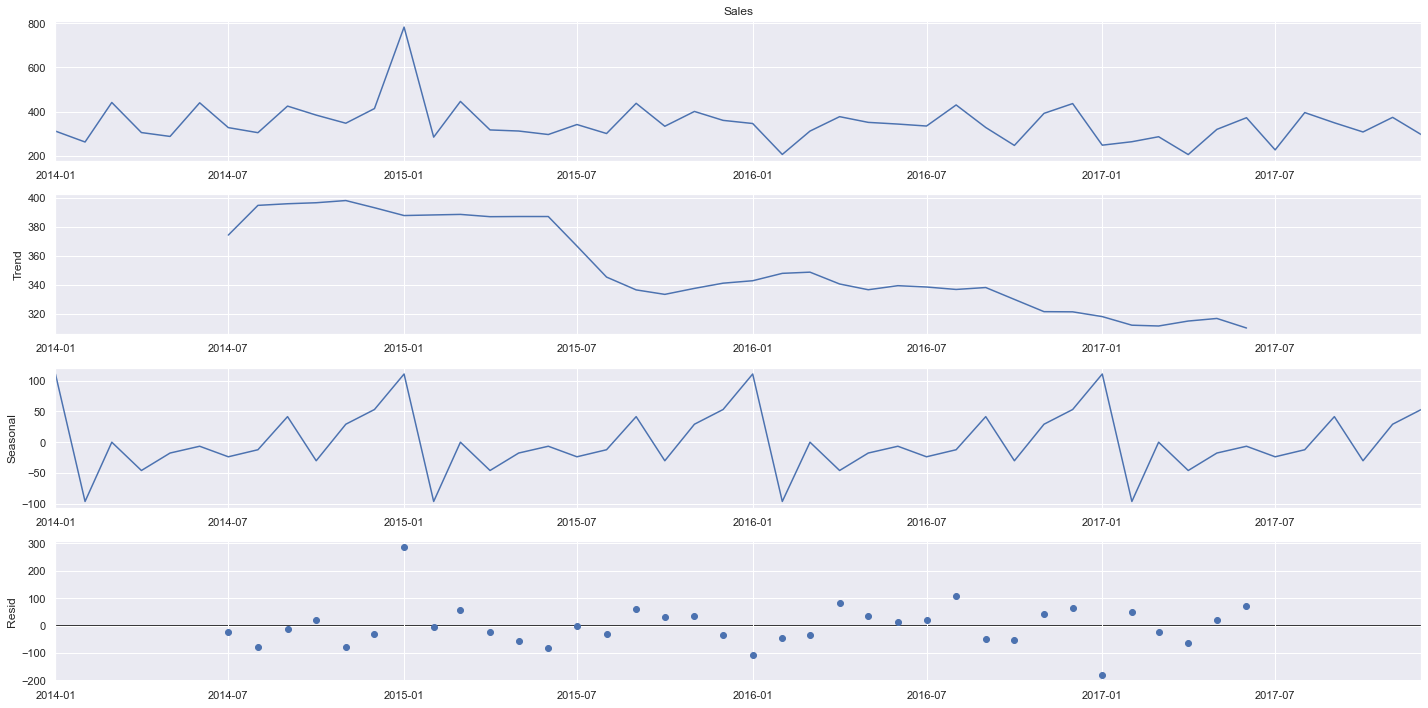

In [72]:
#Additive time series: Value = Level + Trend + Seasonality + Noise
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(month_sales, model='additive')#additive model is used
fig = decomposition.plot()
plt.show()
#plot 1: observed values 
#plot 2: trend
#plot 3: seasonality 
#plot 4: residual values (after removing the trend and seasonality)

In [73]:
#The plot above clearly shows that the sales of furniture is unstable,
#along with its obvious seasonality.

In [74]:
#arima: Auto-regressive Integrated moving average
#arima(p,d,q): these three parameters denotes seasonality, trend and noise in data


In [75]:
p = d = q = range(0, 2) 

for i in p: 
    print(i)

0
1


In [76]:
pdq = list(itertools.product(p, d, q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [77]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [78]:
#AIC: Akaike information criteria
#it tells us godness of fit
#low aic is desired


In [79]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(month_sales, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:702.6705312928079
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2240.082154473632
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:453.9753787461527
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:445.7034283800302
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:628.5073497932726
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1763.3518703595626
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:449.8565436289621
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:447.66543172441357
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:668.148017933542
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2347.6937784221955
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:455.4607930434126
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:447.60523417147095
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:623.1645142919406
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1499.572167223614
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:451.79486304204454
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:449.5456441124935
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:592.3531323021211
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1867.704498166242
ARIMA(

In [43]:
#ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:442.03332186513956

In [44]:
#fitting the arima model 

In [80]:
mod = sm.tsa.statespace.SARIMAX(month_sales,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.259     -0.109      0.913      -0.535       0.479
ma.L1         -1.0000   3949.378     -0.000      1.000   -7741.639    7739.639
ar.S.L12      -0.0458      0.168     -0.273      0.785      -0.375       0.283
ma.S.L12      -1.0000   3949.454     -0.000      1.000   -7741.787    7739.787
sigma2      7306.8516      0.497   1.47e+04      0.000    7305.877    7307.826


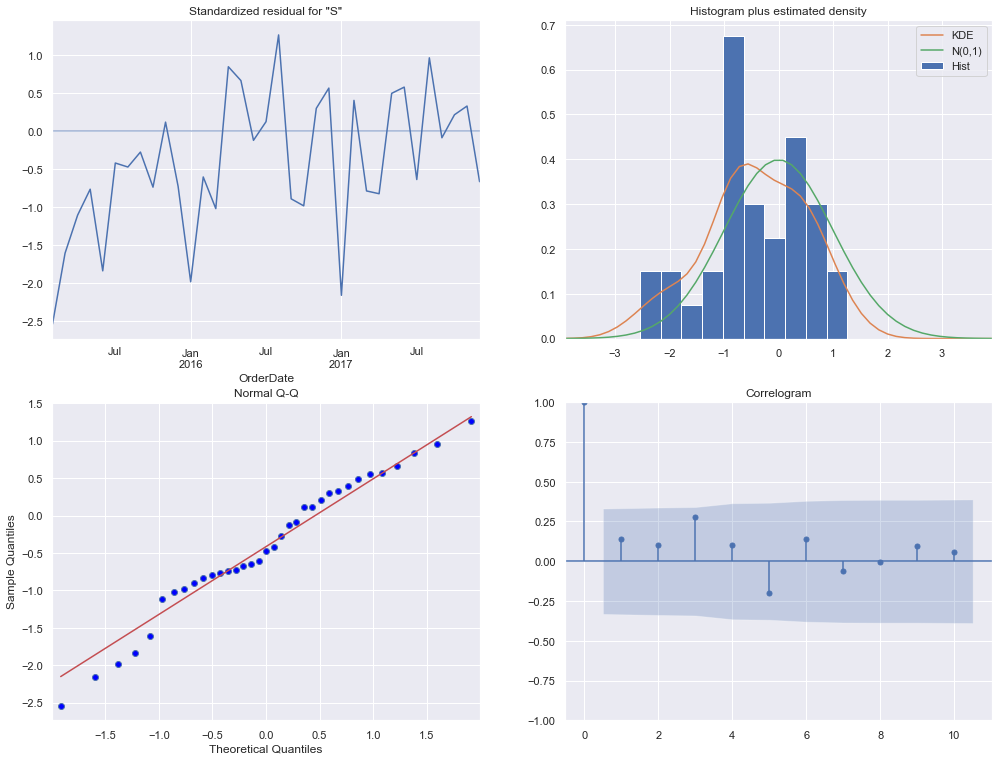

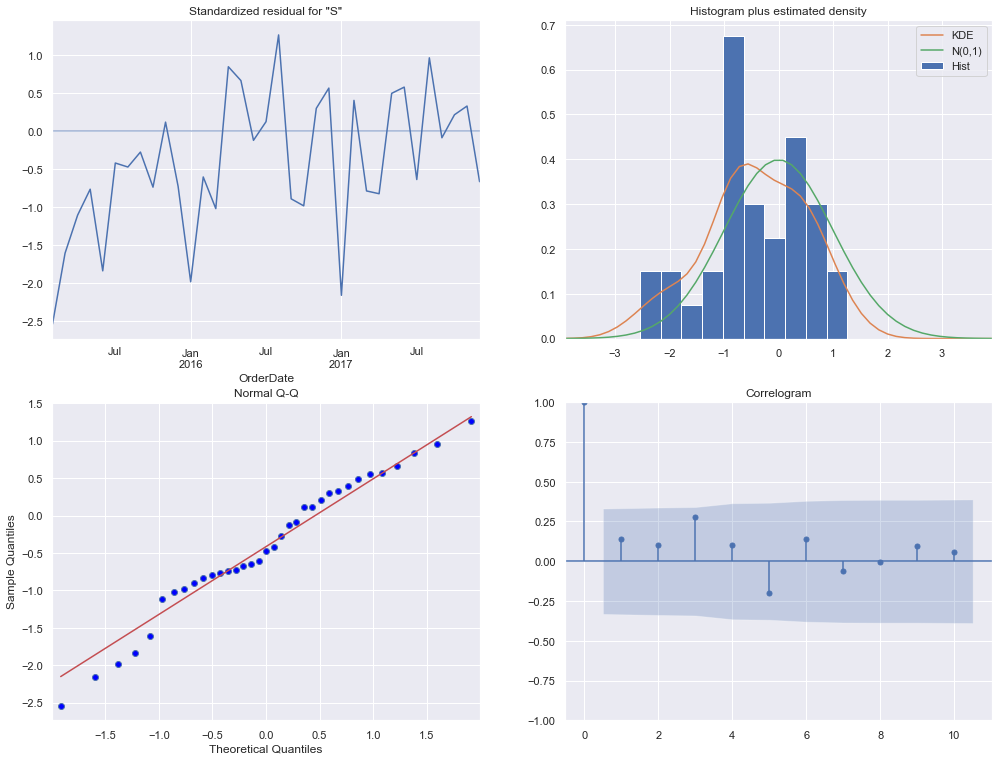

In [81]:
# model diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()
#model residuals are near normally distributed

In [82]:
#Validating forecasts

<AxesSubplot:xlabel='OrderDate'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'furniture Supplies Sales')

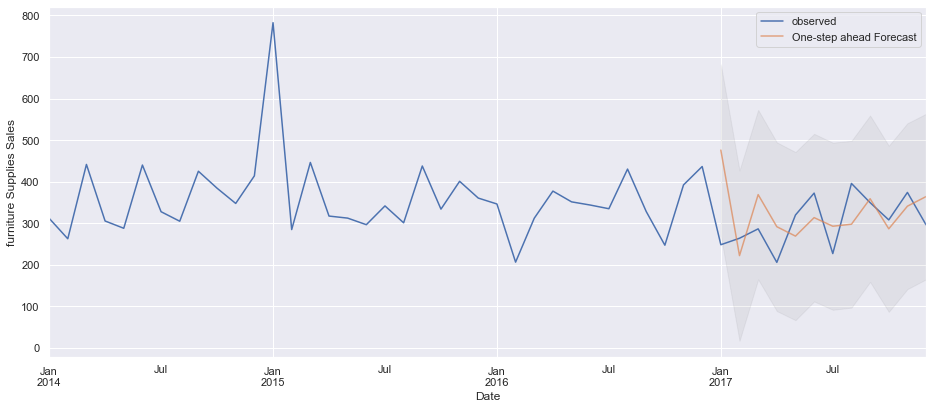

In [83]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = month_sales['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .05)

ax.set_xlabel('Date')
ax.set_ylabel('furniture Supplies Sales')
plt.legend()
plt.show()

In [84]:
monthly_forecasted = pred.predicted_mean
monthly_truth = month_sales['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7834.0


In [85]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 88.51


In [86]:
#Producing and visualizing forecasts

<AxesSubplot:xlabel='OrderDate'>

Text(0.5, 0, 'order Date')

Text(0, 0.5, 'furniture Supplies Sales')

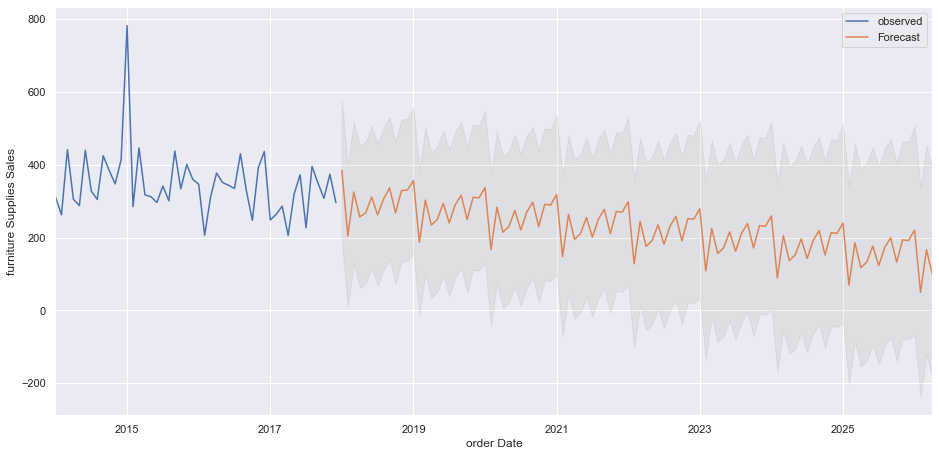

In [87]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = month_sales.plot(label = 'observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'black',
               alpha = .05)

ax.set_xlabel('order Date')
ax.set_ylabel('furniture Supplies Sales')
plt.legend()
plt.show()


In [88]:
#Time Series of Furniture vs. Office Supplies
furniture = data.loc[data['Category'] == 'Furniture']
Office = data.loc[data['Category'] == 'Office Supplies']
furniture.shape, Office.shape
Office

((2121, 21), (6026, 21))

,Row ID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,9/28/2016,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [89]:
#Data Exploration
#We are comparing two categories’ sales in the same time period. This means combine two data frames into one and plot these two categories’
#time series into one plot

In [90]:
furniture = furniture.sort_values('OrderDate')
Office = Office.sort_values('OrderDate')
furniture = furniture.groupby('OrderDate')['Sales'].sum().reset_index()
Office = Office.groupby('OrderDate')['Sales'].sum().reset_index()
furniture = furniture.set_index('OrderDate')
Office = Office.set_index('OrderDate')
y_furniture = furniture['Sales'].resample('MS').mean()
y_Office = Office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'OrderDate':y_furniture.index, 'Sales':y_furniture.values})
Office = pd.DataFrame({'OrderDate': y_Office.index, 'Sales': y_Office.values})
store = furniture.merge(Office, how='inner', on='OrderDate')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'Office_sales'}, inplace=True)
store.head()

,OrderDate,furniture_sales,Office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049187,324.346545


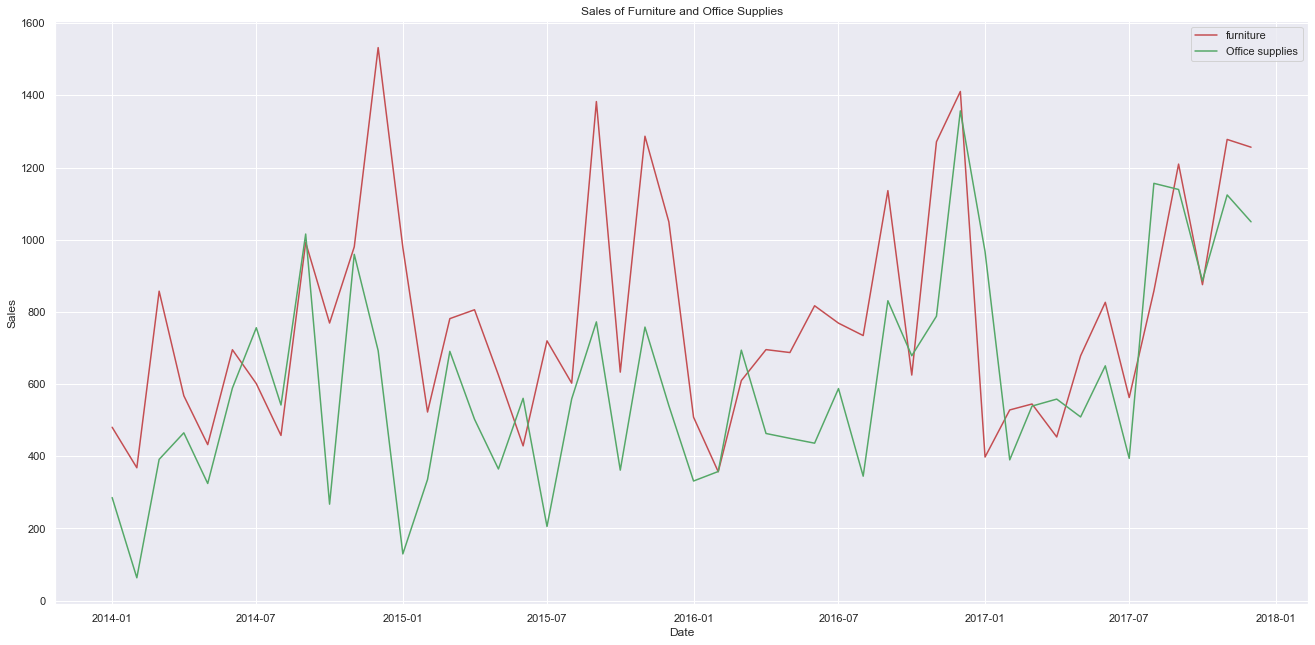

In [91]:
plt.figure(figsize=(20, 10))
plt.plot(store['OrderDate'], store['furniture_sales'], 'r-', label = 'furniture')
plt.plot(store['OrderDate'], store['Office_sales'], 'g-', label = 'Office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [92]:
first_date = store.loc[np.min(list(np.where(store['Office_sales'] > store['furniture_sales'])[0])), 'OrderDate']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


In [93]:
/********************************/

SyntaxError: invalid syntax (<ipython-input-93-4357638818a1>, line 1)

In [ ]:
#Office Supplies Forecast

In [94]:
o_s= data.loc[data['Category']== 'Office Supplies']
o_s
o_s_col = ['RowID', 'OrderID', 'ShipDate', 'ShipMode',
       'CustomerID', 'CustomerName', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'Quantity', 'Discount', 'Profit']

o_s.drop(o_s_col, axis =1 , inplace=True)

,Row ID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,9/28/2016,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,5/23/2015,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


KeyError: "['RowID' 'Postal Code'] not found in axis"

In [95]:

os = o_s.sort_values('OrderDate')
os = os.set_index('OrderDate')
os

,Row ID,OrderID,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
OrderDate,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,1/7/2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,741,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,740,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,742,CA-2014-112326,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,1/12/2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,5092,CA-2017-156720,1/3/2018,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
2017-12-30,1298,CA-2017-115427,1/3/2018,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
2017-12-30,909,CA-2017-143259,1/3/2018,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910


In [96]:
os_y = os['Sales'].resample('MS').mean()

<AxesSubplot:xlabel='OrderDate'>

Text(0, 0.5, 'Sales')

Text(0.5, 0, 'Order Date')

Text(0.5, 1.0, 'OrderDate Vs Office supply Sales')

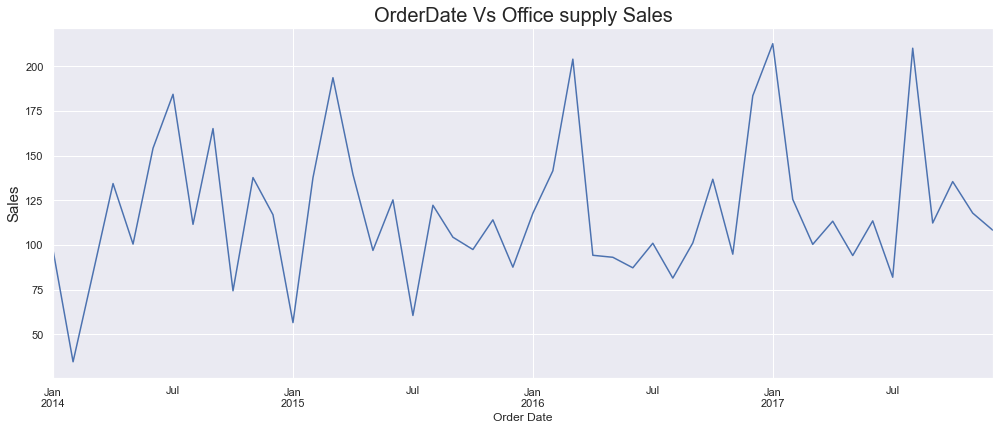

In [97]:

os_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=15)
plt.xlabel("Order Date",fontsize=12)
plt.title("OrderDate Vs Office supply Sales",fontsize=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

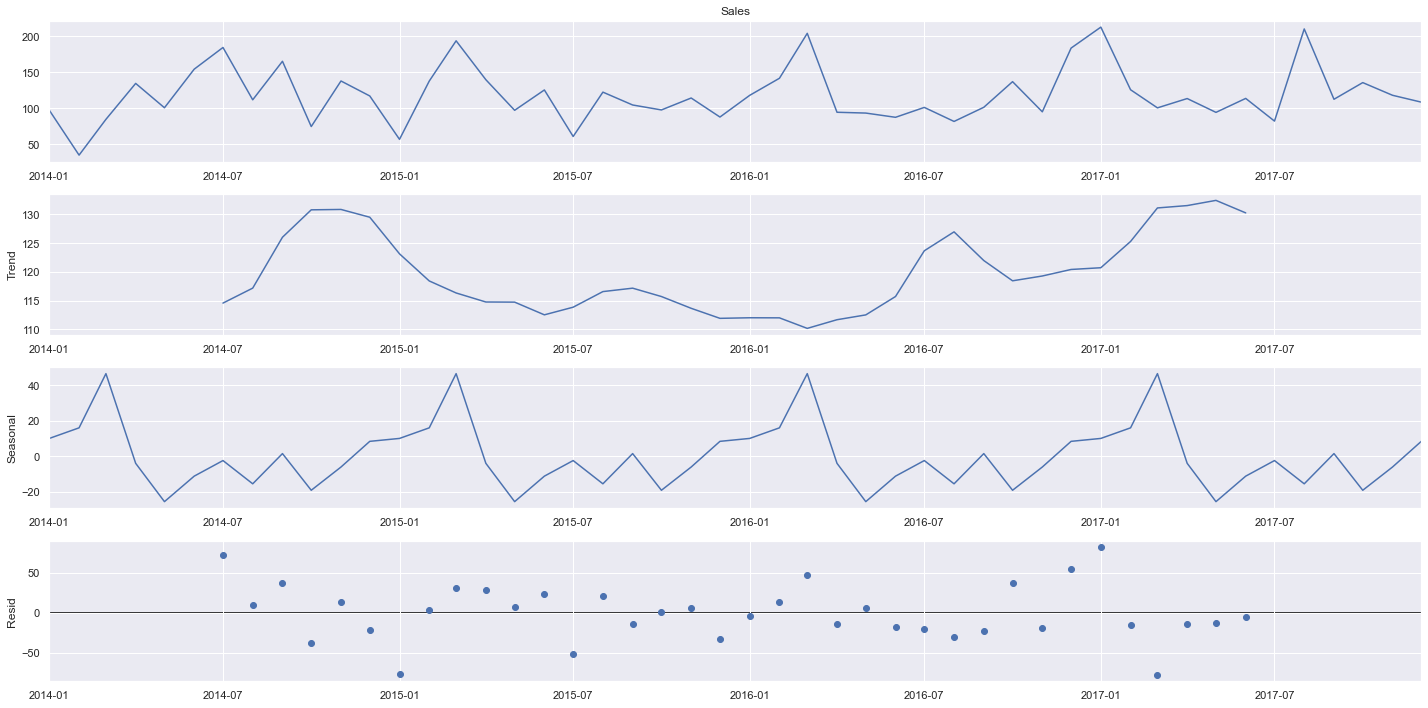

In [98]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decomposition_os = sm.tsa.seasonal_decompose(os_y,model='additive')
fig = decomposition_os.plot()
plt.show

In [99]:

p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(os_y,order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity= False , enforce_invertibility= False )
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 589.5002315061224
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1373.502191299273
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 383.4175511140944
ARIMA(0, 0, 0) x (0, 1, 1, 12) 12 -- AIC : 248.89284131159198
ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 394.83867919808836
ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1400.3130768750518
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 260.5044719309093
ARIMA(0, 0, 0) x (1, 1, 1, 12) 12 -- AIC : 250.10262158198887
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 545.8315751699388
ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2536.359848654672
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 371.8194830276593
ARIMA(0, 0, 1) x (0, 1, 1, 12) 12 -- AIC : 240.39856988629987
ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 396.43734243158156
ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 2559.046263473955
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 262.17351638193776
ARIMA(0, 0, 1) x (1, 1, 1, 12) 12 -- AIC : 242.26144570280863
ARIMA(0, 1, 0) x

In [100]:
#ARIMA(1, 1, 1) x (1, 1, 1, 12) 12 -- AIC : 235.53068980339862

In [101]:

mod_os = sm.tsa.statespace.SARIMAX(os_y,
                               order=(1,1,1),
                               seasonal_order= (1,1,1,12),
                               enforce_invertibility=False)

results_os = mod_os.fit()

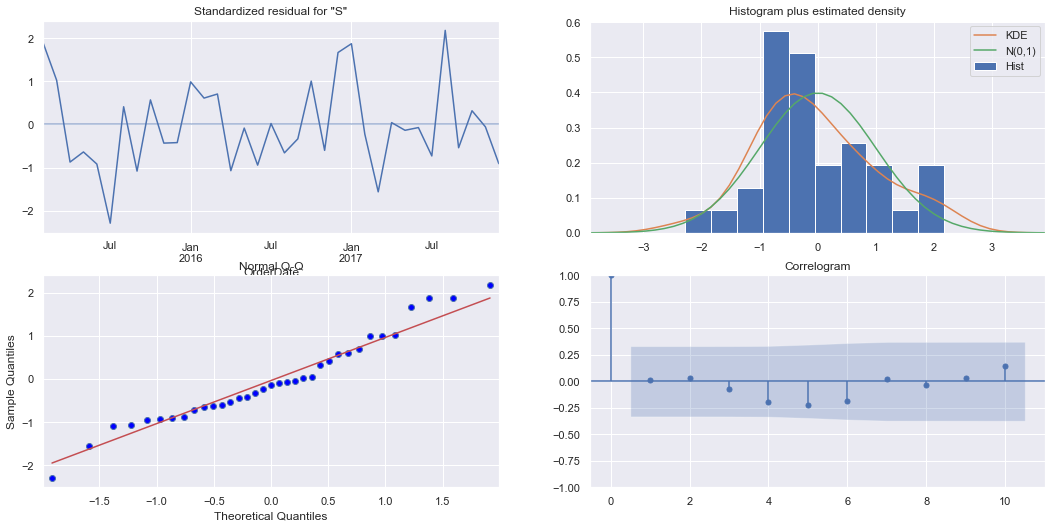

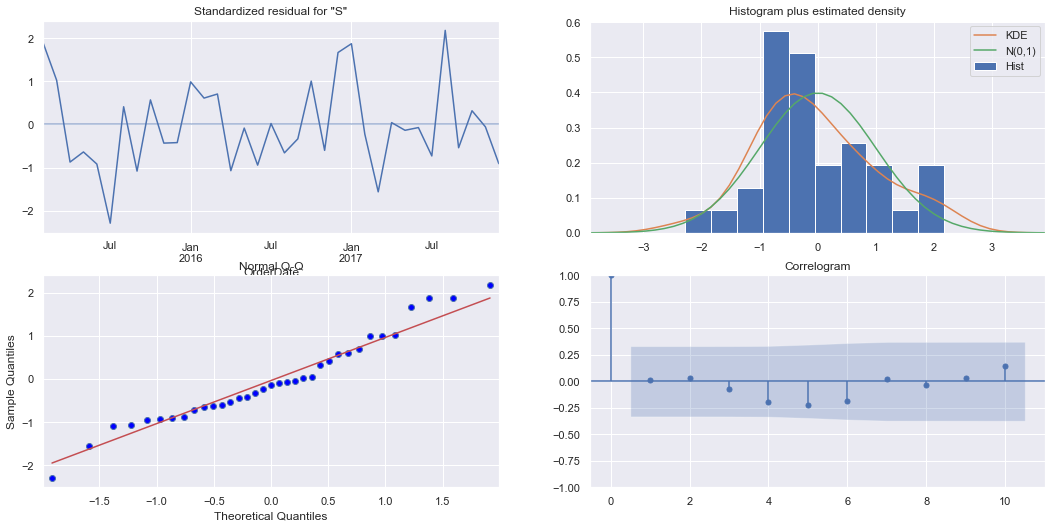

In [102]:
results_os.plot_diagnostics(figsize=(16,8))
plt.show()

In [103]:
pred_os = results_os.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci_os = pred_os.conf_int()

ax = os_y['2014':].plot(label= 'observed')

pred_os.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 7, figsize= (14,7))

ax.fill_between(pred_ci_os.index,
               pred_ci_os.iloc[:,0],
               pred_ci_os.iloc[:,1],color = 'black', alpha= 0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()

plt.show()

<AxesSubplot:xlabel='OrderDate'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Office Supplies Sales')

ValueError: RGBA values should be within 0-1 range

<Figure size 1008x504 with 1 Axes>

In [104]:

office_forecasted = pred_os.predicted_mean
office_truth = os_y['2017-01-01':]
mse = ((office_forecasted - office_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse,2)))

MSE of forecast :2900.98


<AxesSubplot:xlabel='OrderDate'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Office Supplies Sales')

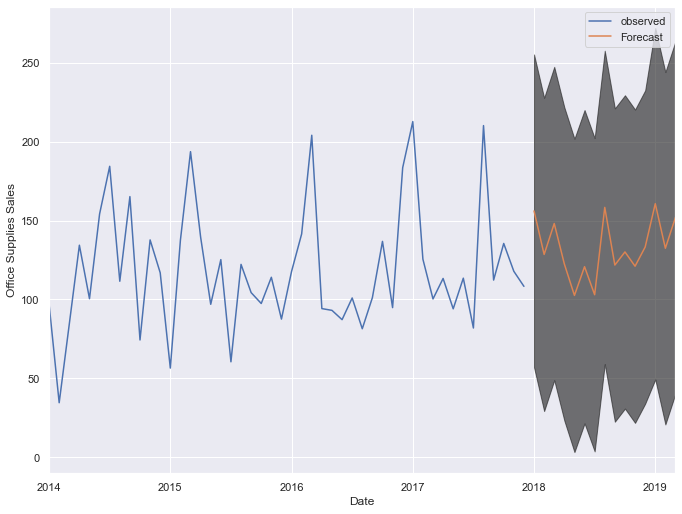

In [105]:
pred_uc_os = results.get_forecast(steps = 15)
pred_ci_os = pred_uc_os.conf_int()

ax = os_y.plot(label='observed', figsize=(10,8))
pred_uc_os.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_os.index,
               pred_ci_os.iloc[:,0],
               pred_ci_os.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')

plt.legend()
plt.show()

<AxesSubplot:xlabel='OrderDate'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Office Supplies Sales')

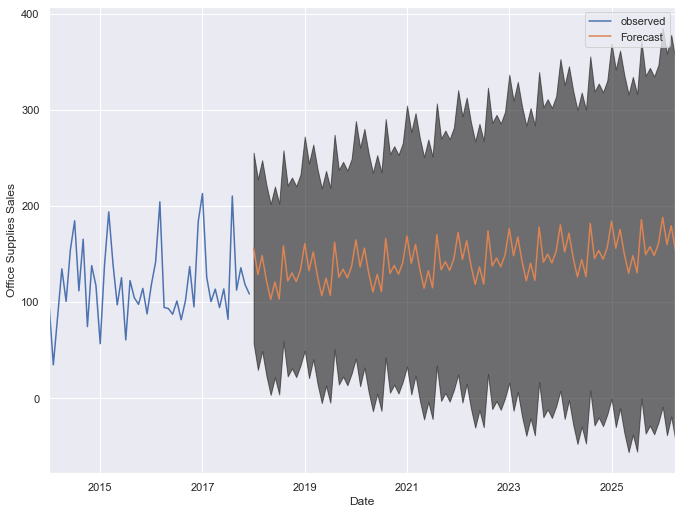

In [106]:
pred_uc_os = results.get_forecast(steps = 100)
pred_ci_os = pred_uc_os.conf_int()

ax = os_y.plot(label='observed', figsize=(10,8))
pred_uc_os.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_os.index,
               pred_ci_os.iloc[:,0],
               pred_ci_os.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')

plt.legend()
plt.show()